<a href="https://colab.research.google.com/github/marsgitahi/Real-Estate-Analysis/blob/main/House_Net_Worth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DATA LOADING**

In [ ]:
# Load Dataset
#Defining file path
#fp=/M3_House_Worth.csv
#Library (pandas)
import pandas as pd
#Read csv file
fp=pd.read_csv("/content/M3_House_Worth.csv")
fp

,HousePrice,StoreArea,BasementArea,LawnArea,HouseNetWorth
0,138800,29.9,75,11.223911,Low
1,155000,44.0,504,9.689869,Medium
2,152000,46.2,493,10.192613,Medium
3,160000,46.2,510,6.817316,Medium
4,226000,48.7,445,10.916215,Medium
...,...,...,...,...,...
311,99900,59.8,0,7.982364,Low
312,290000,84.4,740,10.029866,High
313,67000,34.6,41,9.529874,Low
314,260000,66.0,1300,10.388070,High


The dataset includes variables such as House Price, Store Area, Basement Area, Lawn Area and House Networth which are the columns. It also has 316 rows.

In [ ]:
#Viewing the Head
fp.head()

,HousePrice,StoreArea,BasementArea,LawnArea,HouseNetWorth
0,138800,29.9,75,11.223911,Low
1,155000,44.0,504,9.689869,Medium
2,152000,46.2,493,10.192613,Medium
3,160000,46.2,510,6.817316,Medium
4,226000,48.7,445,10.916215,Medium


The output shows the first few rows

In [ ]:
#Viewing the tail
fp.tail()

,HousePrice,StoreArea,BasementArea,LawnArea,HouseNetWorth
311,99900,59.8,0,7.982364,Low
312,290000,84.4,740,10.029866,High
313,67000,34.6,41,9.529874,Low
314,260000,66.0,1300,10.388070,High
315,84500,8.1,0,11.454849,Low


The output shows the last few rows

In [ ]:
#Dataset Information
fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316 entries, 0 to 315
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   HousePrice     316 non-null    int64  
 1   StoreArea      316 non-null    float64
 2   BasementArea   316 non-null    int64  
 3   LawnArea       316 non-null    float64
 4   HouseNetWorth  316 non-null    object 
dtypes: float64(2), int64(2), object(1)
memory usage: 12.5+ KB


The above are the data types in the dataset; Integer (2), Object (1) and Float (2)

It also shows that there are 316 non-null counts for each column, indicating that there are no missing values



In [ ]:
#Dataset Description
fp.describe()

,HousePrice,StoreArea,BasementArea,LawnArea
count,316.000000,316.000000,316.000000,316.000000
mean,213355.272152,48.312658,573.015823,9.913504
std,122491.768329,24.722463,564.160849,1.558365
min,39300.000000,1.800000,0.000000,6.213974
25%,115000.000000,27.000000,0.000000,9.211559
50%,173950.000000,47.600000,402.500000,9.922729
75%,294057.750000,67.300000,1107.000000,10.488359
max,755000.000000,122.000000,2188.000000,21.539383


The summary statistics shows the patterns in the dataset.

House prices have an average of $213,355.27.

It can be seen that most properties have basement space while some lack it entirely.

The average measure of the lawn area is 9.91 square units, indicating moderate outdoor space.

In [ ]:
#Shape of the Dataset
print(fp.shape)

(316, 5)


The above is the shape of the dataset. It has 316 rows and 5 columns.

In [ ]:
#Datatype
print(fp.dtypes)

HousePrice         int64
StoreArea        float64
BasementArea       int64
LawnArea         float64
HouseNetWorth     object
dtype: object


The output gives the datatypes in the dataset; int64 for Integer,float64 for Float and object

In [ ]:
#Data Cleaning
#Missing Values in the head and tail
fp.isnull()

,HousePrice,StoreArea,BasementArea,LawnArea,HouseNetWorth
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
311,False,False,False,False,False
312,False,False,False,False,False
313,False,False,False,False,False
314,False,False,False,False,False


There are no missing values in the head and tail

In [ ]:
#Missing values in the whole dataset
fp.isnull().sum()

HousePrice       0
StoreArea        0
BasementArea     0
LawnArea         0
HouseNetWorth    0
dtype: int64

Ther are no missing values in this dataset

In [ ]:
#Duplicate
fp.duplicated().sum()

0

There are no duplicates

In [ ]:
# Outliers (Numerical Columns)
numerical_columns = fp.select_dtypes(include=['float64', 'int64']).columns
numerical_columns


Index(['HousePrice', 'StoreArea', 'BasementArea', 'LawnArea'], dtype='object')

In [ ]:
outliers = fp[numerical_columns].apply(lambda x: (x - x.mean()).abs() > 3 * x.std()).sum()

print("\nOutliers:")
print(outliers)


Outliers:
HousePrice      4
StoreArea       0
BasementArea    0
LawnArea        7
dtype: int64


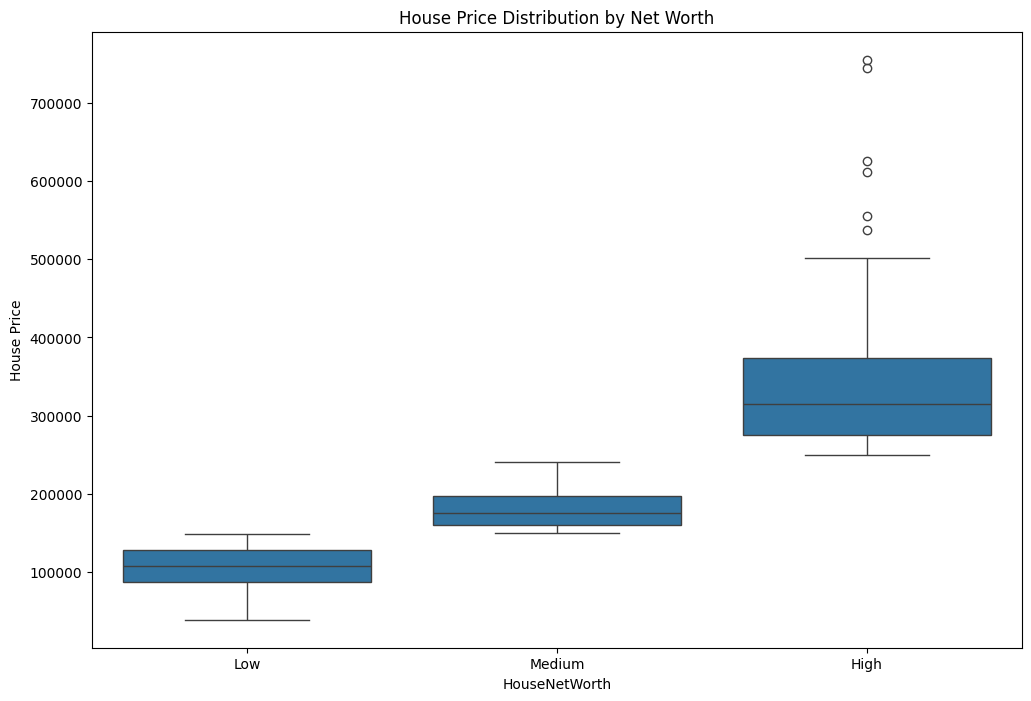

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Box plot to visualize the distribution of numerical variables across 'HouseNetWorth' categories
plt.figure(figsize=(12, 8))
sns.boxplot(x='HouseNetWorth', y='HousePrice', data=fp)
plt.title('House Price Distribution by Net Worth')
plt.xlabel('HouseNetWorth')
plt.ylabel('House Price')
plt.show()

Outliers identified: HousePrice (4), StoreArea (0), BasementArea (0), LawnArea (7). Further investigation needed to assess their impact on analysis.

In [ ]:
# Define the z-score threshold for outlier detection
threshold = 3

# Calculate z-scores for each numerical column
z_scores = fp[numerical_columns].apply(lambda x: (x - x.mean()) / x.std())

# Find rows where any z-score exceeds the threshold
outlier_rows = z_scores[(z_scores.abs() > threshold).any(axis=1)]
outlier_rows

,HousePrice,StoreArea,BasementArea,LawnArea
56,4.421887,1.411160,1.563356,1.412030
58,3.251661,1.362621,2.862631,0.479813
62,0.348144,0.185554,0.962463,3.385361
83,1.401276,1.661944,2.192609,3.247124
93,0.544075,0.375664,0.145321,4.104488
99,1.319637,0.120835,1.175169,7.460305
164,3.360591,1.310037,1.442823,2.462821
236,2.650339,1.447564,1.494227,3.398018
282,0.723679,1.034984,1.145035,5.459294
298,1.540060,0.921726,1.396737,3.066133


In [ ]:
# Remove outlier rows from the DataFrame
fp_filtered = fp.drop(outlier_rows.index)

# Display the filtered DataFrame
print(fp_filtered)

     HousePrice  StoreArea  BasementArea   LawnArea HouseNetWorth
0        138800       29.9            75  11.223911           Low
1        155000       44.0           504   9.689869        Medium
2        152000       46.2           493  10.192613        Medium
3        160000       46.2           510   6.817316        Medium
4        226000       48.7           445  10.916215        Medium
..          ...        ...           ...        ...           ...
311       99900       59.8             0   7.982364           Low
312      290000       84.4           740  10.029866          High
313       67000       34.6            41   9.529874           Low
314      260000       66.0          1300  10.388070          High
315       84500        8.1             0  11.454849           Low

[305 rows x 5 columns]


The dataframe now has no outliers

we can do further analysis

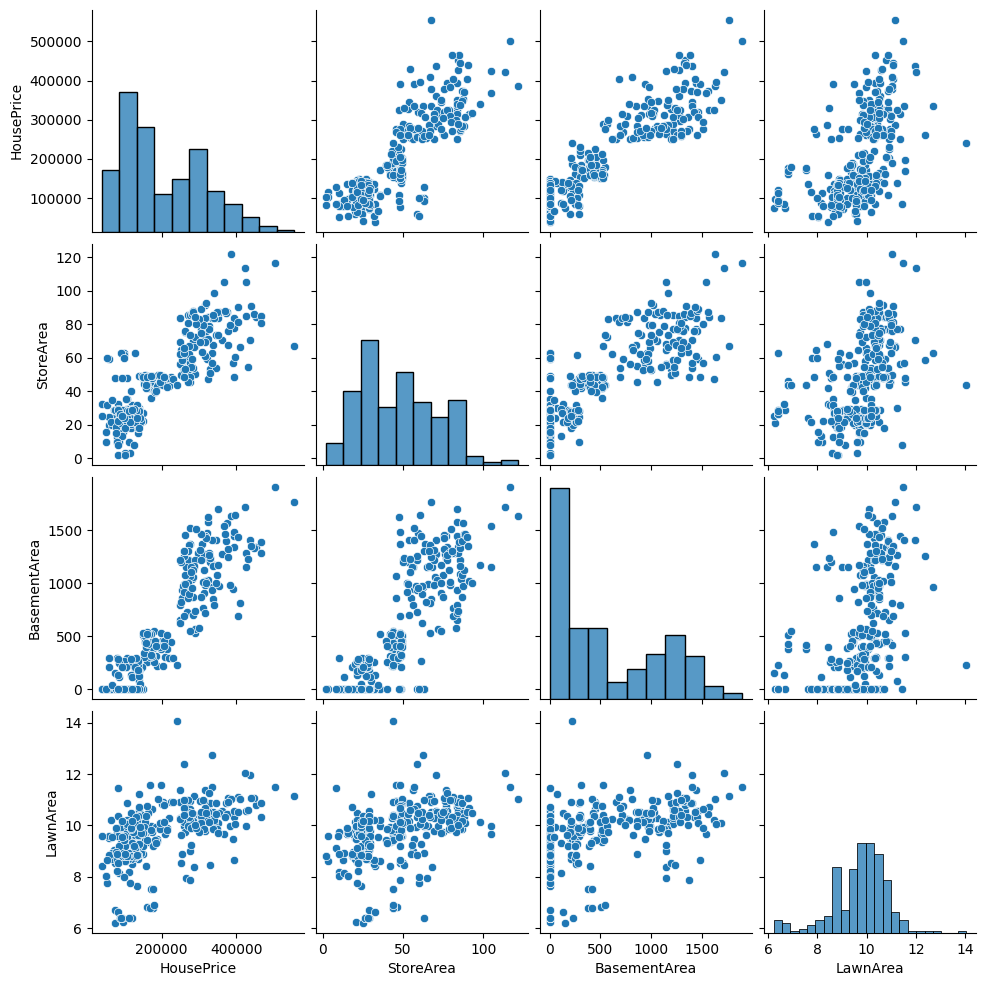

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot to visualize pairwise relationships and distributions
sns.pairplot(fp_filtered)
plt.show()

In [ ]:
 #Drop the 'HouseNetWorth' column temporarily for correlation calculation
numerical_fp = fp_filtered.drop('HouseNetWorth', axis=1)

# Calculate the correlation matrix for numerical variables
correlation_matrix = numerical_fp.corr()
correlation_matrix

,HousePrice,StoreArea,BasementArea,LawnArea
HousePrice,1.000000,0.851111,0.911756,0.531044
StoreArea,0.851111,1.000000,0.837051,0.453920
BasementArea,0.911756,0.837051,1.000000,0.470109
LawnArea,0.531044,0.453920,0.470109,1.000000


Correalation is for numerical columns

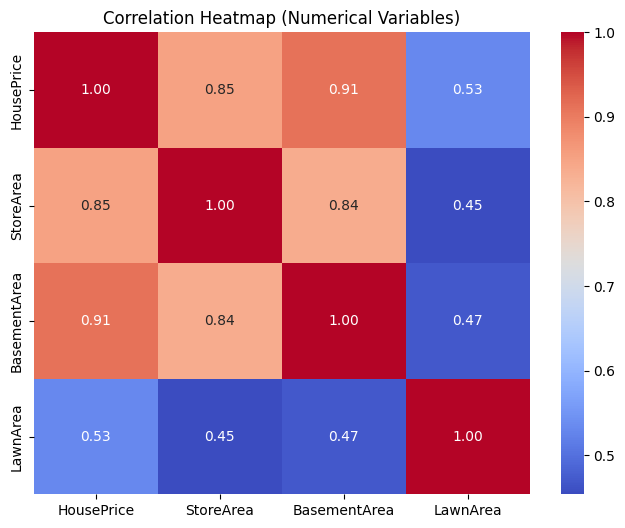

In [ ]:
 #Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Numerical Variables)')
plt.show()

<ipython-input-19-abe58526c673>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HouseNetWorth', data=fp_filtered, palette='Set2')


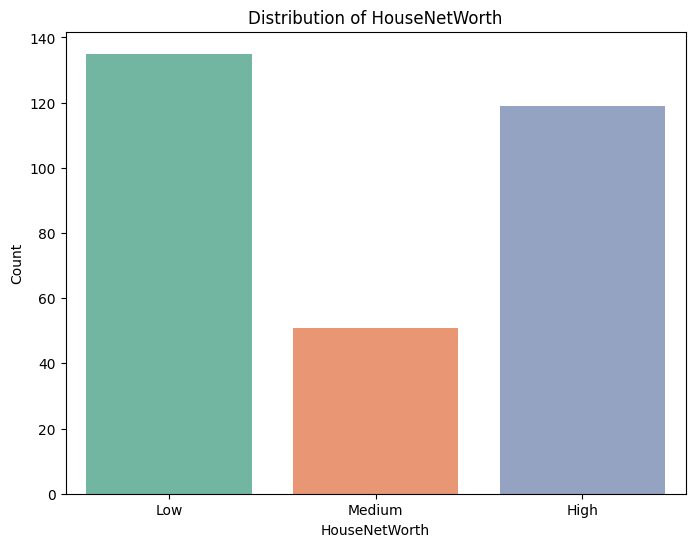

In [ ]:
#Countplot to visualize the distribution of 'HouseNetWorth'
plt.figure(figsize=(8, 6))
sns.countplot(x='HouseNetWorth', data=fp_filtered, palette='Set2')
plt.title('Distribution of HouseNetWorth')
plt.xlabel('HouseNetWorth')
plt.ylabel('Count')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming X and y are your feature and target variables
X = fp_filtered.drop(columns=['HouseNetWorth'])
y = fp_filtered['HouseNetWorth']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:")
print(report)


Accuracy: 0.819672131147541
Classification Report:
              precision    recall  f1-score   support

        High       0.83      0.89      0.86        28
         Low       0.96      0.85      0.90        27
      Medium       0.29      0.33      0.31         6

    accuracy                           0.82        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.83      0.82      0.83        61



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#Clustering


from sklearn.cluster import KMeans

# Initialize KMeans model
kmeans = KMeans(n_clusters=3, random_state=42)

# Fit the model to your data
kmeans.fit(X)

# Get cluster labels
kmeans_labels = kmeans.labels_
kmeans_labels

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 2, 1, 2, 1,
       1, 1, 1, 0, 1, 2, 1, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 2, 1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 2, 1, 0, 1, 1, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 2, 1, 1, 1, 0, 2, 1, 1, 2, 1,
       0, 2, 0, 2, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 1, 1, 0, 2, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 2, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 2,
       0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 2, 1, 2, 1, 0, 0, 1,
       1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 0, 1,

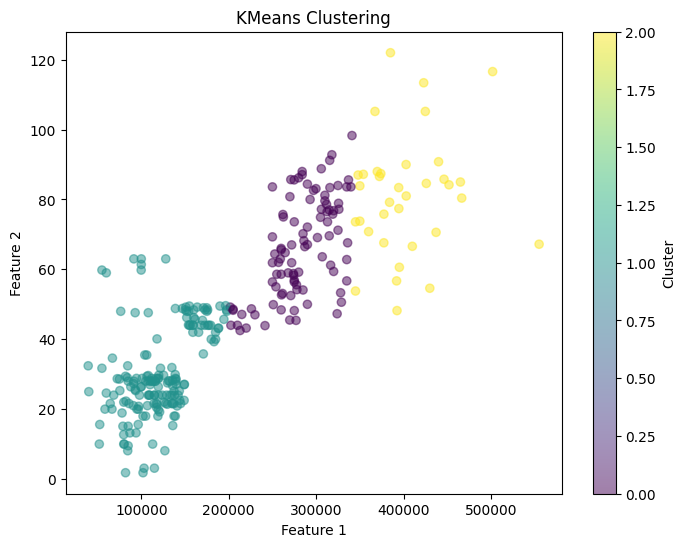

In [ ]:
import matplotlib.pyplot as plt

# Scatter plot of the data points with cluster assignments from KMeans
plt.figure(figsize=(8, 6))
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.5)
plt.title('KMeans Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.show()

In [ ]:
!pip install pyclustering

from pyclustering.cluster import cluster_visualizer
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import FCPS_SAMPLES

# Load sample data
sample = read_sample(FCPS_SAMPLES.SAMPLE_TARGET)

# Initialize KMedoids model
pam_instance = kmedoids(sample, [2, 5])

# Run PAM algorithm
pam_instance.process()

# Get cluster labels
pam_clusters = pam_instance.get_clusters()
pam_clusters

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395100 sha256=83262cd2981b711c78a32b2aa27bee6efd196ccfaa2280413134148134c8e8b0
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


[[0,
  2,
  399,
  401,
  403,
  405,
  406,
  407,
  409,
  411,
  413,
  414,
  418,
  420,
  427,
  432,
  433,
  437,
  439,
  442,
  445,
  447,
  448,
  449,
  454,
  462,
  463,
  464,
  465,
  466,
  468,
  470,
  475,
  481,
  491,
  494,
  495,
  502,
  503,
  504,
  505,
  506,
  507,
  508,
  511,
  513,
  514,
  516,
  517,
  518,
  520,
  522,
  524,
  525,
  527,
  529,
  530,
  532,
  533,
  536,
  541,
  545,
  552,
  555,
  558,
  559,
  561,
  562,
  564,
  569,
  572,
  574,
  576,
  577,
  579,
  583,
  584,
  587,
  588,
  590,
  592,
  593,
  597,
  600,
  604,
  610,
  611,
  618,
  621,
  624,
  625,
  626,
  627,
  628,
  630,
  645,
  654,
  655,
  656,
  661,
  662,
  663,
  669,
  671,
  674,
  675,
  676,
  679,
  684,
  687,
  690,
  691,
  698,
  706,
  709,
  710,
  711,
  716,
  719,
  726,
  729,
  731,
  733,
  735,
  739,
  740,
  741,
  744,
  745,
  746,
  749,
  751,
  754,
  758,
  765,
  766,
  768],
 [1,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10

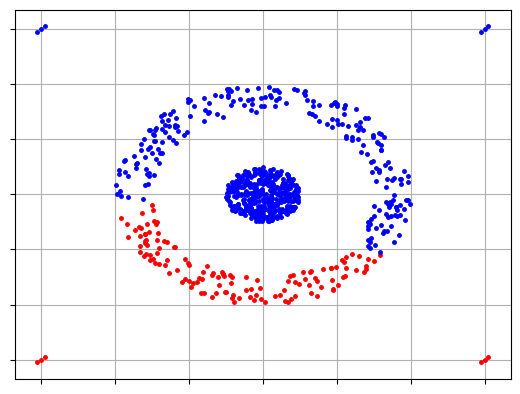

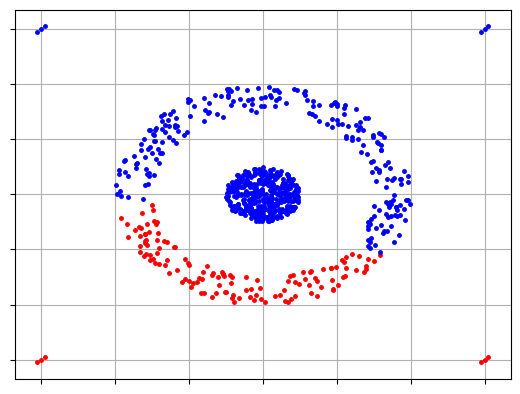

In [ ]:
 #Create an instance of the visualizer
visualizer = cluster_visualizer()

# Add clusters to the visualizer
visualizer.append_clusters(pam_clusters, sample)

# Visualize the clusters
visualizer.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, log_loss

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)

# Compute precision for multiclass classification
precision = precision_score(y_test, y_pred, average='weighted')

# Compute recall for multiclass classification
recall = recall_score(y_test, y_pred, average='weighted')

# Compute F1-score
f1 = f1_score(y_test, y_pred, average='weighted')

# Generate predicted probabilities
y_pred_prob = model.predict_proba(X_test)

# Compute ROC AUC
roc_auc = roc_auc_score(y_test, y_pred_prob, multi_class='ovr')

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Compute log loss
logloss = log_loss(y_test, y_pred_prob)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)
print("Log Loss:", logloss)


Accuracy: 0.819672131147541
Precision: 0.8347970335675254
Recall: 0.819672131147541
F1-score: 0.8251971484771672
ROC AUC: 0.9214724273547802
Confusion Matrix:
 [[25  0  3]
 [ 2 23  2]
 [ 3  1  2]]
Log Loss: 0.4522458955859055


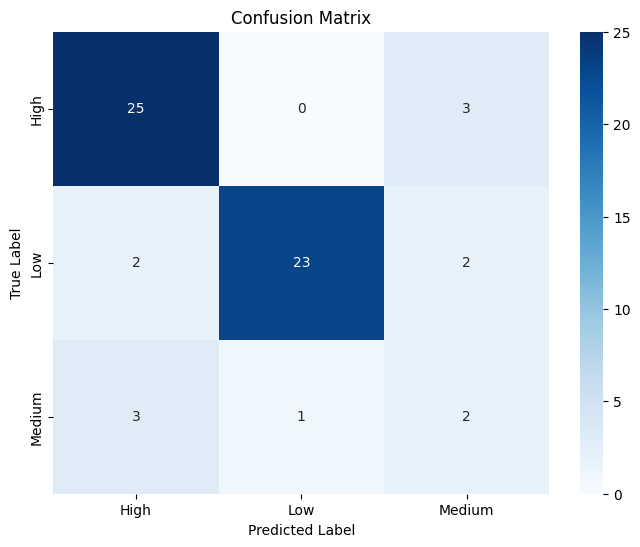

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['High', 'Low', 'Medium'], yticklabels=['High', 'Low', 'Medium'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler


# Assuming X and y are your feature and target variables
X = fp_filtered.drop(columns=['HouseNetWorth'])
y = fp_filtered['HouseNetWorth']

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# K-nearest neighbour
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
print("K-nearest neighbour:")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

# Install sklearn_lvq library
!pip install sklearn-lvq

K-nearest neighbour:
Accuracy: 0.9672131147540983
Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00        28
         Low       1.00      0.93      0.96        27
      Medium       0.75      1.00      0.86         6

    accuracy                           0.97        61
   macro avg       0.92      0.98      0.94        61
weighted avg       0.98      0.97      0.97        61

